In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import requests
import json

In [32]:
#All coins

url = "http://api.coincap.io/v2/assets"
payload={}
headers = {}
response = requests.request("GET", url, headers=headers, data=payload)

data_coins = json.loads(response.text)

df_coins = pd.json_normalize(data_coins['data']) #Results contain the required data
display(df_coins)

,id,rank,symbol,name,supply,maxSupply,marketCapUsd,volumeUsd24Hr,priceUsd,changePercent24Hr,vwap24Hr,explorer
0,bitcoin,1,BTC,Bitcoin,18800156.0000000000000000,21000000.0000000000000000,930562568775.1563876751467716,16036233497.4208157455369196,49497.5982526504773511,0.4588943799836761,48954.2914214519573973,https://blockchain.info/
1,ethereum,2,ETH,Ethereum,117296146.6865000000000000,None,384702344541.3442577098076004,7312451905.4190932591036206,3279.7526211116440545,0.2421576959009240,3243.2016299136754246,https://etherscan.io/
2,cardano,3,ADA,Cardano,32145348141.2990000000000000,45000000000.0000000000000000,91851481487.7194384340661892,2657129024.0702706301874656,2.8573802058069016,-0.8886253067890289,2.8443267070966697,https://cardanoexplorer.com/
3,binance-coin,4,BNB,Binance Coin,168137036.0000000000000000,168137036.0000000000000000,82914034070.7820322679607456,860331567.6088964084748095,493.1336726477207096,0.0884795312884213,487.8457803029506406,https://etherscan.io/token/0xB8c77482e45F1F44d...
4,tether,5,USDT,Tether,65509475280.7425840000000000,None,65551967625.6916990600969828,28571492759.3631378377548003,1.0006486442574454,0.0019658404091417,1.0006726752058745,https://www.omniexplorer.info/asset/31
...,...,...,...,...,...,...,...,...,...,...,...,...
95,horizen,96,ZEN,Horizen,11459631.2500000000000000,21000000.0000000000000000,959821125.8677580651252131,15030060.3715441152837387,83.7567199963574801,-4.3909774900526964,85.6769579401420243,https://explorer.zensystem.io/
96,digibyte,97,DGB,DigiByte,14619905742.8212450000000000,21000000000.0000000000000000,959331080.3479738360971194,8704492.9322610162161969,0.0656181440033586,-2.8713293415248909,0.0658060380861539,https://digiexplorer.info/
97,swissborg,98,CHSB,SwissBorg,1000000000.0000000000000000,None,940131327.0840407000000000,1598219.0805653289152238,0.9401313270840407,1.6017050491541517,0.9251326732412874,https://etherscan.io/token/0xba9d4199fab4f26ef...
98,0x,99,ZRX,0x,845341601.7894509000000000,1000000000.0000000000000000,934906040.0288618433438793,36523821.7602088517410784,1.1059505861888467,0.7380728875889328,1.0835884709247980,https://etherscan.io/token/ZRX


In [33]:
#Historical data, only open time

token="bitcoin"

url="http://api.coincap.io/v2/assets/"+token+"/history?interval=d1"


payload={}
headers = {}

response = requests.request("GET", url, headers=headers, data=payload)



data_hist = json.loads(response.text)

df_hist = pd.json_normalize(data_hist['data']) #Results contain the required data
display(df_hist)

,priceUsd,time,date
0,9625.9481675363395959,1567209600000,2019-08-31T00:00:00.000Z
1,9648.6550266896698847,1567296000000,2019-09-01T00:00:00.000Z
2,9947.6788207019578869,1567382400000,2019-09-02T00:00:00.000Z
3,10513.5386716031343967,1567468800000,2019-09-03T00:00:00.000Z
4,10563.4622545869587316,1567555200000,2019-09-04T00:00:00.000Z
...,...,...,...
724,48923.7821166104602235,1629763200000,2021-08-24T00:00:00.000Z
725,48278.2287161976338082,1629849600000,2021-08-25T00:00:00.000Z
726,47375.5564643128687974,1629936000000,2021-08-26T00:00:00.000Z
727,47743.3148411565180496,1630022400000,2021-08-27T00:00:00.000Z


In [34]:
#Historical for candles, only btc vs eth

url="http://api.coincap.io/v2/candles?exchange=kraken&interval=d1&baseId=ethereum&quoteId=bitcoin"

payload={}
headers = {}

response = requests.request("GET", url, headers=headers, data=payload)

data = json.loads(response.text)


df = pd.json_normalize(data['data']) #Results contain the required data
display(df)

,open,high,low,close,volume,period
0,0.0175700000000000,0.0180800000000000,0.0173900000000000,0.0179000000000000,4531.1366809600000000,1567209600000
1,0.0179000000000000,0.0180300000000000,0.0175200000000000,0.0175200000000000,5590.6664294100000000,1567296000000
2,0.0175400000000000,0.0177400000000000,0.0171600000000000,0.0171900000000000,7818.0900954600000000,1567382400000
3,0.0172000000000000,0.0172800000000000,0.0167200000000000,0.0168700000000000,19075.9381454800000000,1567468800000
4,0.0168200000000000,0.0169900000000000,0.0164100000000000,0.0165300000000000,10792.2407731100000000,1567555200000
...,...,...,...,...,...,...
711,0.0665500000000000,0.0667200000000000,0.0653500000000000,0.0658600000000000,1931.5661530600000000,1629849600000
712,0.0659000000000000,0.0665700000000000,0.0654900000000000,0.0660600000000000,1655.9840909500000000,1629936000000
713,0.0660400000000000,0.0673800000000000,0.0657500000000000,0.0665000000000000,2174.4891513500000000,1630022400000
714,0.0667700000000000,0.0668900000000000,0.0660300000000000,0.0663300000000000,1316.7761355800000000,1630108800000


In [35]:
import plotly.graph_objects as go

from datetime import datetime


fig = go.Figure(data=[go.Candlestick(x=df['period'],
                open=df['open'],
                high=df['high'],
                low=df['low'],
                close=df['close'])])

fig.show()

## Coingecko api

Installation via pip: pip install pycoingecko

github: https://github.com/man-c/pycoingecko

In [36]:
#Coingecko api

from pycoingecko import CoinGeckoAPI
cg = CoinGeckoAPI()

cg.get_price(ids='bitcoin,cardano,ethereum', vs_currencies='usd')

{'ethereum': {'usd': 3289.94},
 'bitcoin': {'usd': 49640},
 'cardano': {'usd': 2.86}}

In [37]:
import time
import datetime

def edit_prices_dict(d):
    
    df=pd.DataFrame(d)
    
    #Saving dates
    dates=df['prices'].map(lambda x: x[0])  
    
    #Filtering the values without dates
    df=df.applymap(lambda x: x[1])
    
    df['dates']=dates 
    
    df=df[['dates','prices','total_volumes','market_caps']]
    
    return df

#dd/mm/yyyy
from_date="01/01/2021"
to_date="28/08/2021"

from_unix=time.mktime(datetime.datetime.strptime(from_date, "%d/%m/%Y").timetuple())
to_unix=time.mktime(datetime.datetime.strptime(to_date, "%d/%m/%Y").timetuple())


response=cg.get_coin_market_chart_range_by_id(id='bitcoin',vs_currency='usd',from_timestamp=from_unix,to_timestamp=to_unix)

df_hist=edit_prices_dict(response)

mask=df_hist['prices'].diff().gt(0)
df_hist['color']='r'
df_hist.loc[mask,'color']='g'

display(df_hist)

,dates,prices,total_volumes,market_caps,color
0,1609545600000,29352.126792,3.408972e+10,5.455933e+11,r
1,1609632000000,32163.824935,5.727344e+10,5.978877e+11,g
2,1609718400000,33008.226203,1.788941e+11,6.136169e+11,g
3,1609804800000,31515.575967,7.465717e+10,5.857263e+11,r
4,1609891200000,34082.206049,6.742050e+10,6.336517e+11,g
...,...,...,...,...,...
234,1629763200000,49518.577488,3.580026e+10,9.307292e+11,g
235,1629849600000,47940.607915,3.838715e+10,9.024895e+11,r
236,1629936000000,49002.703766,3.351733e+10,9.213282e+11,g
237,1630022400000,47229.070651,3.377486e+10,8.878321e+11,r


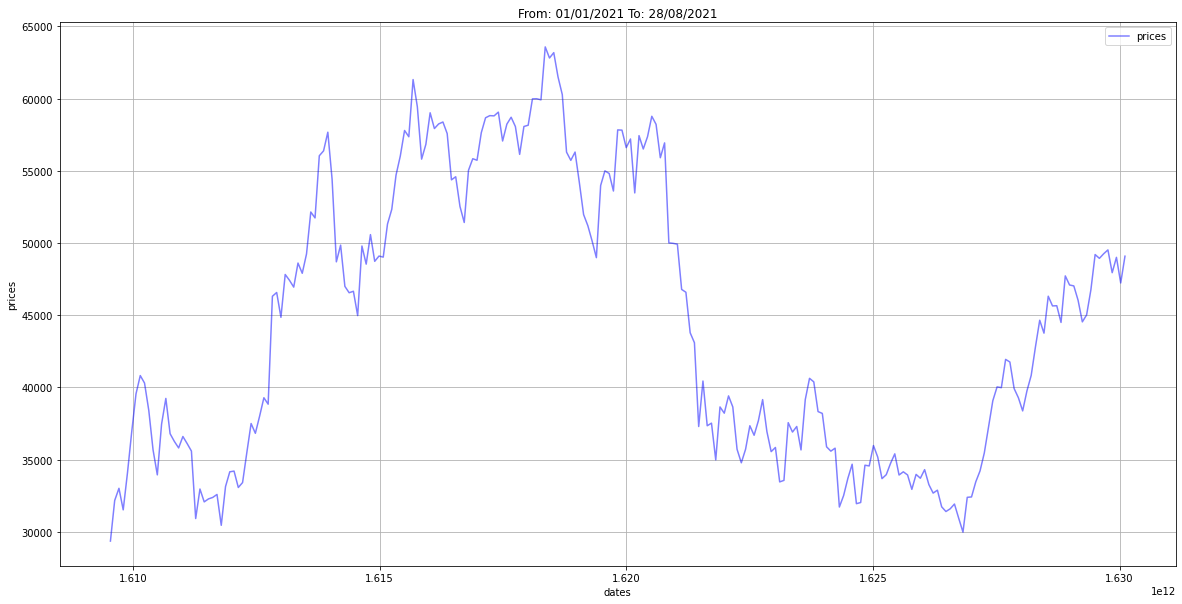

In [38]:
fig=plt.figure(figsize=(20, 10))
plt.plot(df_hist['dates'],df_hist['prices'], 'b', label='prices', alpha=0.5)
plt.title('From: '+from_date+' To: '+to_date)
plt.xlabel('dates')
plt.ylabel('prices')
plt.legend()
plt.grid(True)

<AxesSubplot:>

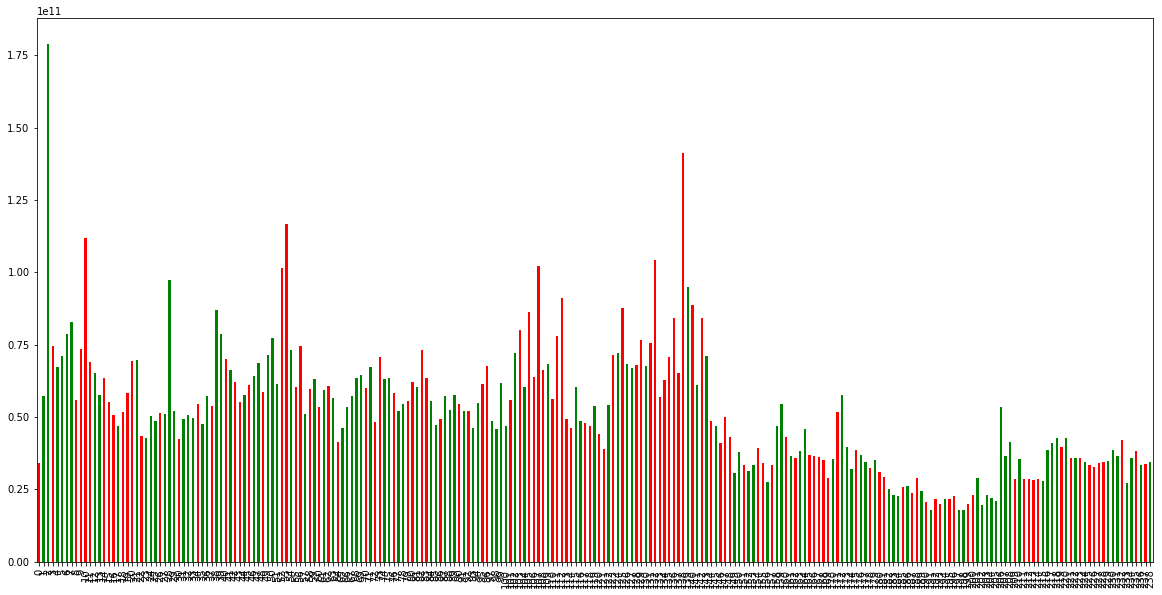

In [39]:
fig=plt.figure(figsize=(20, 10))
df_hist['total_volumes'].plot(kind="bar",color=df_hist['color'])

In [40]:
#You can also request from previous days

response=cg.get_coin_market_chart_by_id(id='bitcoin',vs_currency='usd',days='365')
pd.DataFrame(response)

,prices,market_caps,total_volumes
0,"[1598659200000, 11519.118388160729]","[1598659200000, 212799723684.94672]","[1598659200000, 19271253870.82992]"
1,"[1598745600000, 11481.481823317012]","[1598745600000, 212114842611.5429]","[1598745600000, 18415439613.538937]"
2,"[1598832000000, 11701.004008657852]","[1598832000000, 216179629567.18042]","[1598832000000, 19909556666.601448]"
3,"[1598918400000, 11672.324104943627]","[1598918400000, 215921598551.33038]","[1598918400000, 21077276617.8664]"
4,"[1599004800000, 11895.225345345636]","[1599004800000, 221315690777.34525]","[1599004800000, 25232603061.53493]"
...,...,...,...
361,"[1629849600000, 47940.6079149608]","[1629849600000, 902489541307.5308]","[1629849600000, 38387146174.87064]"
362,"[1629936000000, 49002.70376627545]","[1629936000000, 921328247353.5629]","[1629936000000, 33517327123.555378]"
363,"[1630022400000, 47229.070650876114]","[1630022400000, 887832142450.1957]","[1630022400000, 33774857002.92822]"
364,"[1630108800000, 49083.10330586219]","[1630108800000, 922969799298.9401]","[1630108800000, 34607868773.39842]"
